# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Rayasya Dziqi Cahyana
- **Email:** rayasya.dziqi@gmail.com
- **ID Dicoding:** rayrayaray

## Menentukan Pertanyaan Bisnis

- Apakah penggunaan sepeda lebih tinggi pada hari libur dibandingkan dengan hari kerja?
- Bagaimana cuaca (suhu, kelembapan, kecepatan angin) mempengaruhi jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
data_1 = pd.read_csv('data/data_1.csv')
data_2 = pd.read_csv('data/data_2.csv')

### Assessing Data

In [ ]:
data_1.info()
data_2.info()

- Checking missing value

In [ ]:
data_1.isna().sum()
data_2.isna().sum()

- Showing statistic

In [ ]:
data_1.describe()
data_2.describe()

### Cleaning Data

- Check for duplicates

In [ ]:
data_1.duplicated().sum()
data_2.duplicated().sum()

- Convert to datetime

In [8]:
data_1['dteday'] = pd.to_datetime(data_1['dteday'])
data_2['dteday'] = pd.to_datetime(data_2['dteday'])

## Exploratory Data Analysis (EDA)

### Explore data_2

In [ ]:
data_2.windspeed.max()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

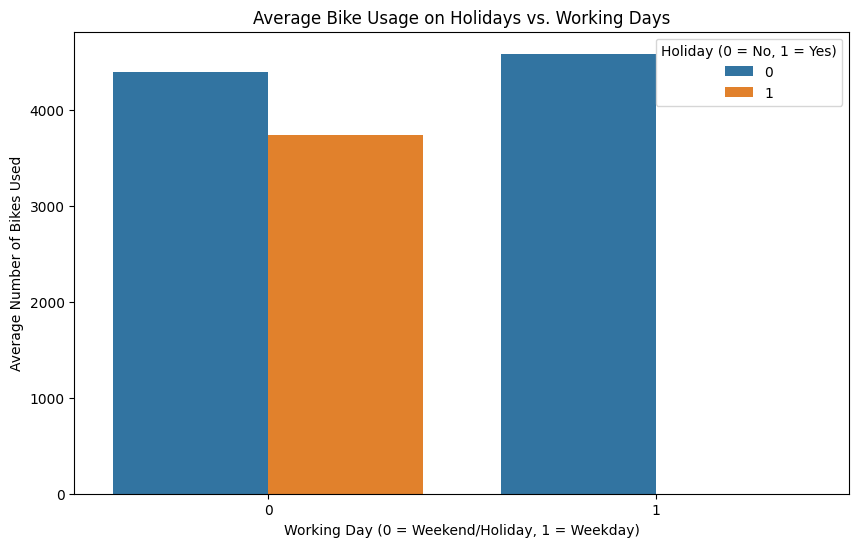

In [13]:
# Calculate average usage on holidays vs. working days
daily_usage = data_1.groupby(['holiday', 'workingday'])['cnt'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_usage, x='workingday', y='cnt', hue='holiday')
plt.title('Average Bike Usage on Holidays vs. Working Days')
plt.xlabel('Working Day (0 = Weekend/Holiday, 1 = Weekday)')
plt.ylabel('Average Number of Bikes Used')
plt.legend(title='Holiday (0 = No, 1 = Yes)')
plt.show()

### Pertanyaan 2:

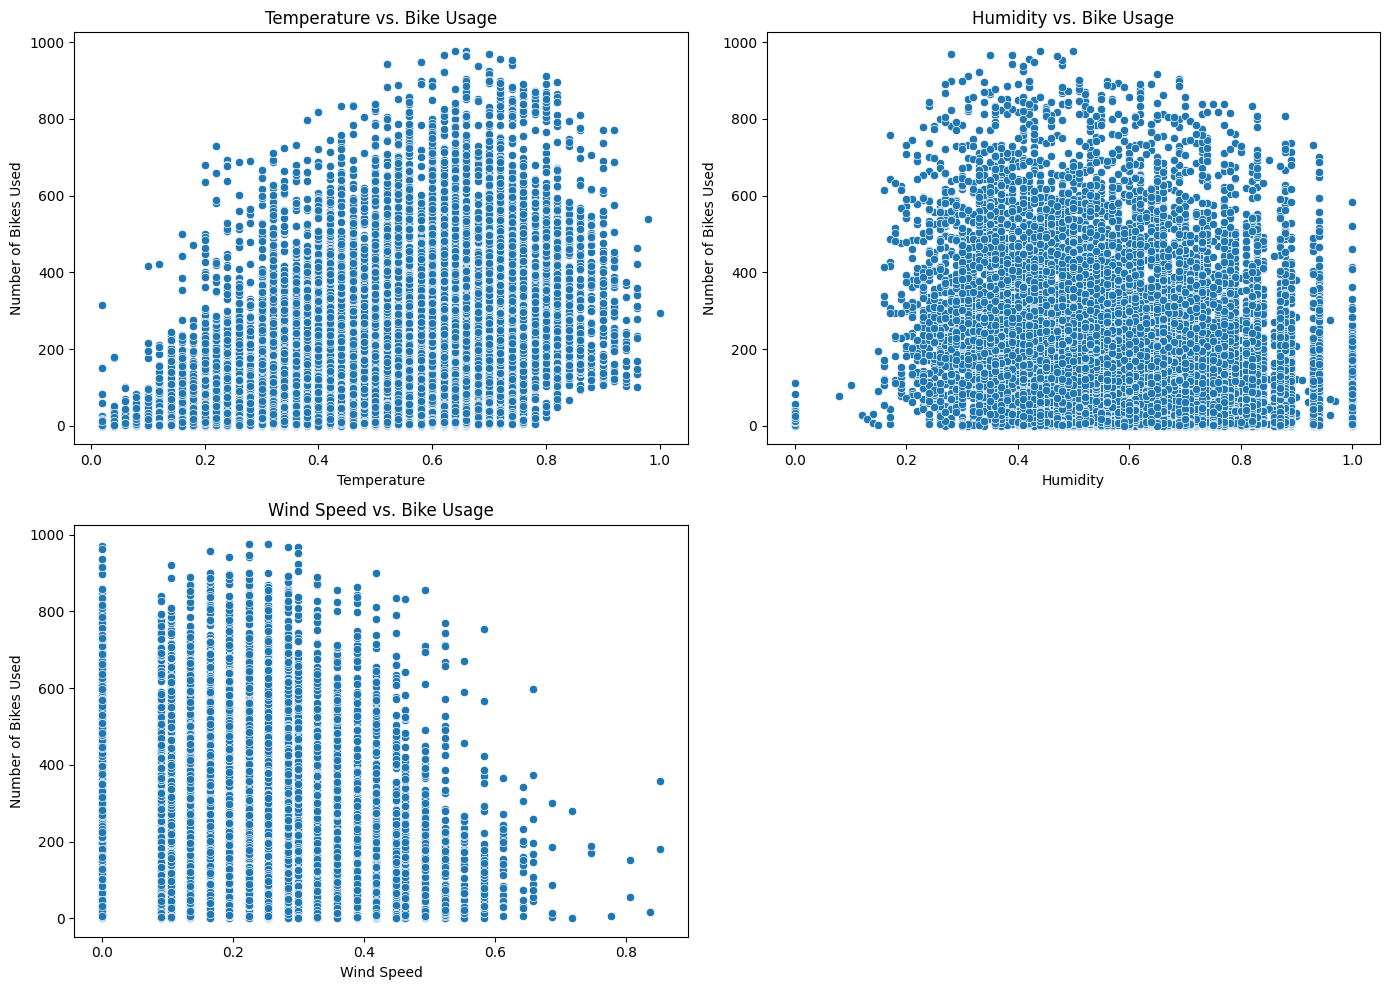

In [14]:
# Scatter plots to visualize the impact of weather on bike usage
plt.figure(figsize=(14, 10))

# Temperature vs. Usage
plt.subplot(2, 2, 1)
sns.scatterplot(data=data_2, x='temp', y='cnt')
plt.title('Temperature vs. Bike Usage')
plt.xlabel('Temperature')
plt.ylabel('Number of Bikes Used')

# Humidity vs. Usage
plt.subplot(2, 2, 2)
sns.scatterplot(data=data_2, x='hum', y='cnt')
plt.title('Humidity vs. Bike Usage')
plt.xlabel('Humidity')
plt.ylabel('Number of Bikes Used')

# Wind Speed vs. Usage
plt.subplot(2, 2, 3)
sns.scatterplot(data=data_2, x='windspeed', y='cnt')
plt.title('Wind Speed vs. Bike Usage')
plt.xlabel('Wind Speed')
plt.ylabel('Number of Bikes Used')

plt.tight_layout()
plt.show()

### Gabungan keduanya

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1400x1000 with 0 Axes>

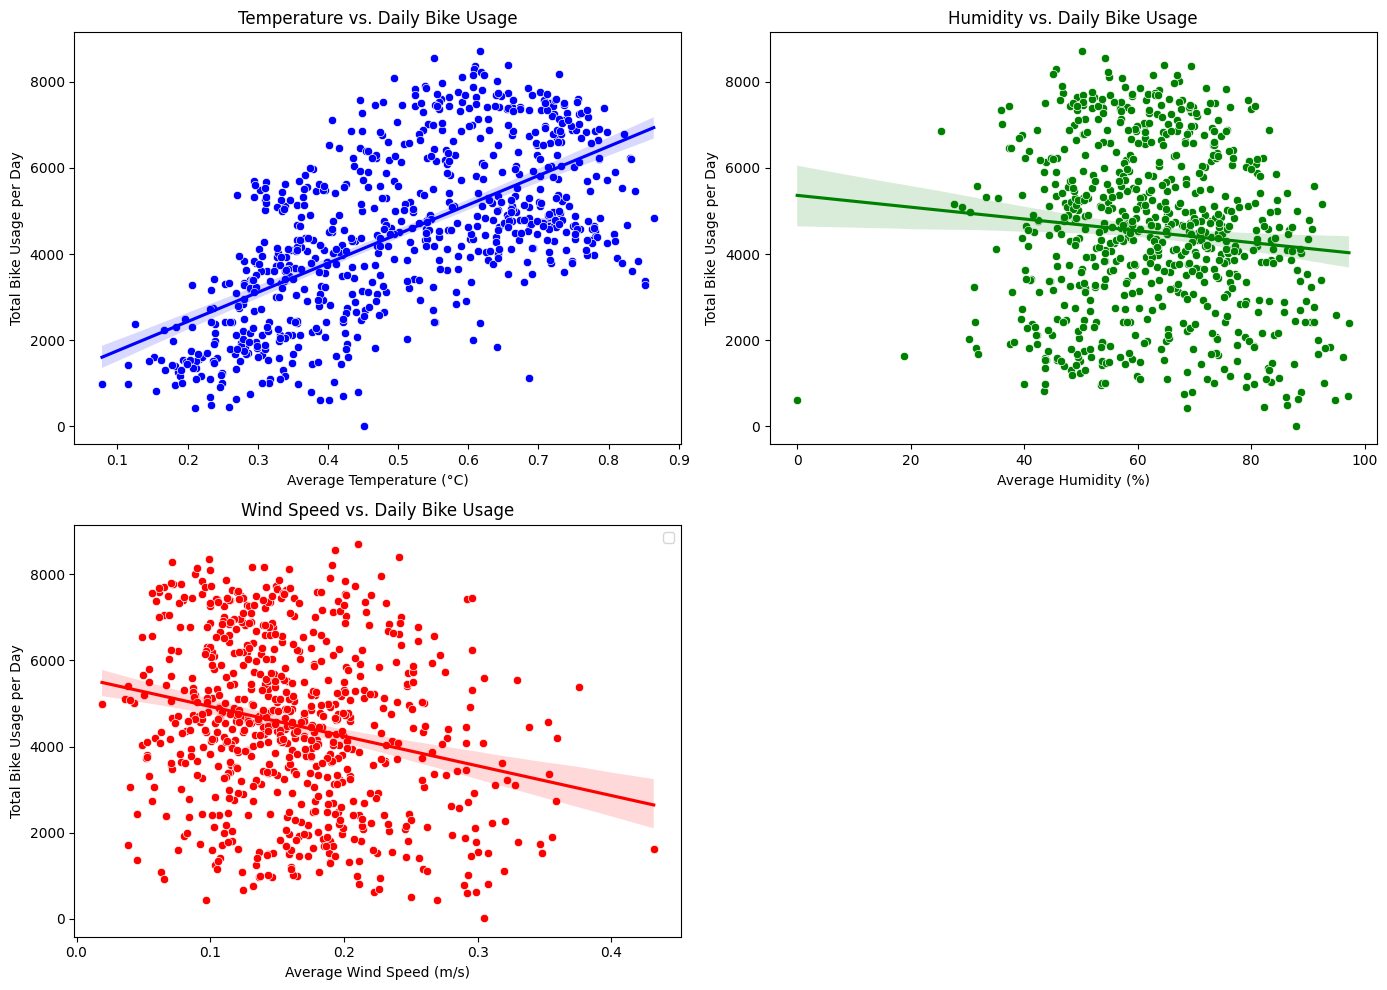

In [15]:
# Plot Average Daily Bike Usage with Temperature
plt.figure(figsize=(14, 10))

data_2_daily = data_2.groupby('dteday').agg({
    'cnt': 'sum',          # Total usage per day
    'temp': 'mean',        # Average temperature per day
    'hum': 'mean',         # Average humidity per day
    'windspeed': 'mean'    # Average windspeed per day
}).reset_index()

# Merge daily data with aggregated hourly data
merged_data = pd.merge(data_1, data_2_daily, on='dteday', suffixes=('_daily', '_hourly'))
merged_data.to_csv('dashboard/main_data.csv', index=False)

temp_min, temp_max = 0.02, 1
hum_min, hum_max = 0, 1
windspeed_min, windspeed_max = 0, 0.8507

# Convert values
merged_data['temp_actual'] = merged_data['temp_hourly'] * (temp_max - temp_min) + temp_min
merged_data['hum_actual'] = merged_data['hum_hourly'] * 100
merged_data['windspeed_actual'] = merged_data['windspeed_hourly'] * (windspeed_max - windspeed_min) + windspeed_min

# Plot Average Daily Bike Usage with Temperature
plt.figure(figsize=(14, 10))

# Temperature vs. Daily Bike Usage
plt.subplot(2, 2, 1)
sns.scatterplot(data=merged_data, x='temp_actual', y='cnt_daily', color='blue')
sns.regplot(data=merged_data, x='temp_actual', y='cnt_daily', scatter=False, color='blue', line_kws={'label': 'Temperature Trend'})
plt.title('Temperature vs. Daily Bike Usage')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Bike Usage per Day')

# Humidity vs. Daily Bike Usage
plt.subplot(2, 2, 2)
sns.scatterplot(data=merged_data, x='hum_actual', y='cnt_daily', color='green')
sns.regplot(data=merged_data, x='hum_actual', y='cnt_daily', scatter=False, color='green', line_kws={'label': 'Humidity Trend'})
plt.title('Humidity vs. Daily Bike Usage')
plt.xlabel('Average Humidity (%)')
plt.ylabel('Total Bike Usage per Day')

# Wind Speed vs. Daily Bike Usage
plt.subplot(2, 2, 3)
sns.scatterplot(data=merged_data, x='windspeed_actual', y='cnt_daily', color='red')
sns.regplot(data=merged_data, x='windspeed_actual', y='cnt_daily', scatter=False, color='red', line_kws={'label': 'Wind Speed Trend'})
plt.title('Wind Speed vs. Daily Bike Usage')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Total Bike Usage per Day')

# Adjust layout and show plot
plt.tight_layout()
plt.legend()
plt.show()


### RFM Analysis

In [24]:
# Load data
data = pd.read_csv('dashboard/main_data.csv')

# Convert dteday to datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Calculate Recency
last_date = data['dteday'].max()
data['recency'] = (last_date - data['dteday']).dt.days

rfm_data = data.groupby('instant').agg({
    'recency': 'min',  # Minimum recency for each user
    'cnt_daily': ['mean', 'sum']  # Average and total bike usage per user
}).reset_index()

# Flatten the MultiIndex columns
rfm_data.columns = ['user_id', 'recency', 'frequency', 'monetary']

rfm_data.head()


,user_id,recency,frequency,monetary
0,1,730,985.0,985
1,2,729,801.0,801
2,3,728,1349.0,1349
3,4,727,1562.0,1562
4,5,726,1600.0,1600


## Conclusion

- Conclusion pertanyaan 1
    - Dataset : data_1.csv
        - Saya menggunakan data_1 karena fokus pada data harian lebih cocok untuk membandingkan hari libur dan hari kerja.
    - Metode : Menghitung rata-rata penggunaan sepeda (cnt) untuk hari libur (holiday) dan hari kerja (workingday).
    - Visualisasi : Plot batang yang membandingkan rata-rata penggunaan sepeda pada hari libur dan hari kerja
    - Kesimpulan : 
        - Penggunaan sepeda lebih tinggi pada hari kerja, mungkin karena sepeda digunakan sebagai alat transportasi untuk pergi ke tempat kerja, sementara pada hari libur, penggunaannya lebih rendah.

- Conclusion pertanyaan 2
    - Dataset : data_2.csv
        - Saya menggunakan data_2 karena data per jam memberikan detail yang lebih baik tentang bagaimana cuaca mempengaruhi penggunaan sepeda.
    - Metode : Menggunakan scatter plot untuk memvisualisasikan hubungan antara suhu (temp), kelembapan (hum), kecepatan angin (windspeed), dan jumlah penggunaan sepeda (cnt).
    - Visualisasi : Scatter plot untuk masing-masing variabel cuaca.
    - Kesimpulan : 
        - Suhu (temp):
            Biasanya, penggunaan sepeda meningkat dengan suhu yang lebih tinggi hingga mencapai titik tertentu, setelah itu mungkin menurun jika suhu terlalu tinggi. Suhu sedang cenderung mendukung aktivitas luar ruangan seperti bersepeda.
        - Kelembapan (hum):
            Kelembapan yang sangat tinggi dapat mengurangi kenyamanan bersepeda, sehingga dapat menyebabkan penurunan penggunaan sepeda. Sebaliknya, kelembapan yang sedang mungkin tidak terlalu mempengaruhi penggunaan sepeda secara signifikan
        - Kecepatan Angin (windspeed):
            Kecepatan angin yang tinggi seringkali dapat membuat bersepeda kurang nyaman dan berpotensi mengurangi penggunaan sepeda. Kecepatan angin yang rendah biasanya lebih mendukung aktivitas bersepeda.
- Conclusion keseluruhan
    - Suhu yang lebih tinggi cenderung meningkatkan penggunaan sepeda. Ini menunjukkan bahwa pengguna sepeda lebih aktif dalam cuaca hangat.
    - Kelembapan tinggi sedikit mengurangi kenyamanan bersepeda, meskipun dampaknya lebih kecil dibandingkan dengan faktor lainnya.
    - Kecepatan angin yang tinggi memiliki dampak negatif yang lebih jelas pada penggunaan sepeda, mengurangi kenyamanan dan jumlah pengguna.